In [35]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [36]:
num_train_samples = len(train_images)
num_test_samples = len(test_images)
num_train_samples

60000

In [37]:
num_test_samples

10000

In [38]:
image_shape = train_images.shape[1:]
image_shape

(28, 28)

In [39]:
num_classes = len(set(train_labels))
num_classes

10

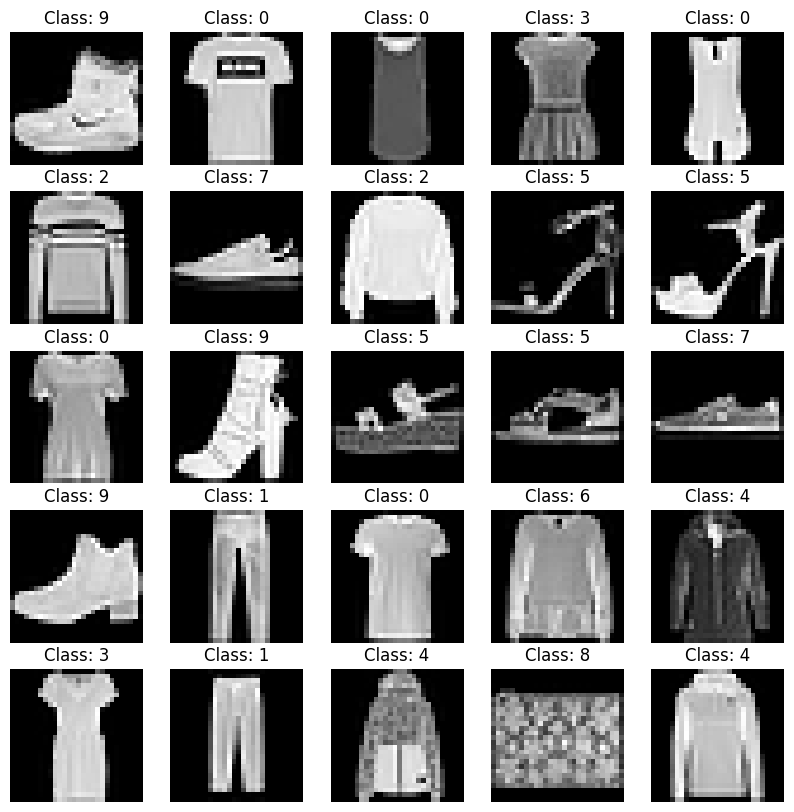

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Class: {train_labels[i]}')
    plt.axis('off')
plt.show()


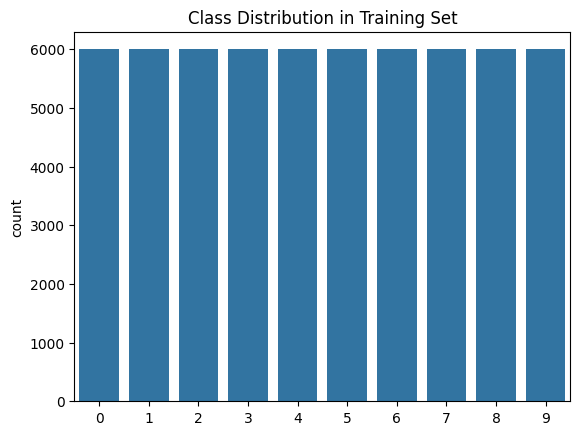

In [41]:
import seaborn as sns

sns.countplot(x=train_labels)
plt.title('Class Distribution in Training Set')
plt.show()


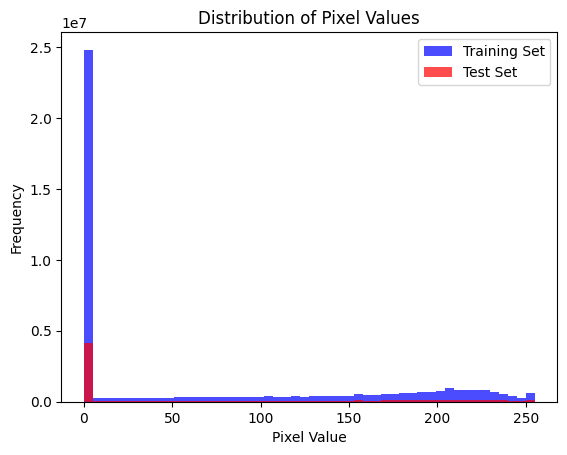

In [42]:
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7, label='Training Set')
plt.hist(test_images.flatten(), bins=50, color='red', alpha=0.7, label='Test Set')
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


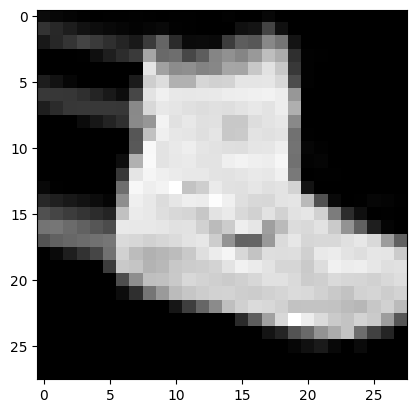

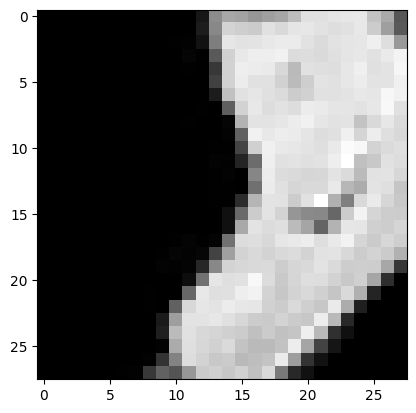

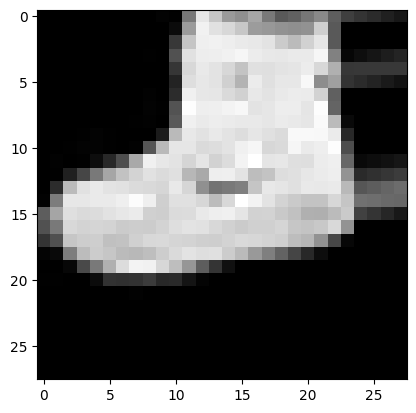

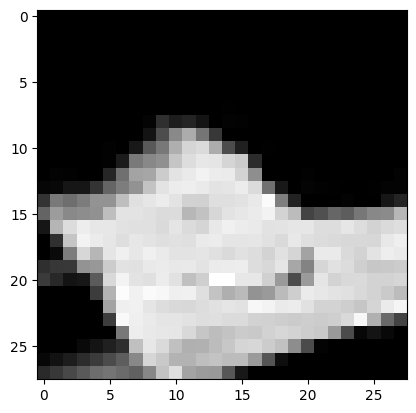

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

img = train_images[0]
img = img.reshape((1,) + img.shape + (1,))
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].reshape(image_shape), cmap='gray')
    i += 1
    if i % 4 == 0:
        break
plt.show()


In [44]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def create_model(input_shape, hidden_layers, neurons_per_layer, output_classes):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=input_shape))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))

    model.add(Dense(output_classes, activation='softmax'))

    return model

def train_model(model, train_data, train_labels, test_data, test_labels, epochs=20, batch_size=128, learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        train_data, train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history



In [46]:
input_shape = (28 * 28,)
output_classes = 10

train_labels_integer = train_labels.astype('int')
test_labels_integer = test_labels.astype('int')

train_labels_one_hot = to_categorical(train_labels_integer, num_classes=output_classes)
test_labels_one_hot = to_categorical(test_labels_integer, num_classes=output_classes)

model1 = create_model(input_shape, hidden_layers=2, neurons_per_layer=64, output_classes=output_classes)
history1 = train_model(model1, train_images_flattened, train_labels_one_hot, test_images_flattened, test_labels_one_hot, learning_rate=0.001)

model2 = create_model(input_shape, hidden_layers=3, neurons_per_layer=128, output_classes=output_classes)
history2 = train_model(model2, train_images_flattened, train_labels_one_hot, test_images_flattened, test_labels_one_hot, learning_rate=0.01)

model3 = create_model(input_shape, hidden_layers=1, neurons_per_layer=256, output_classes=output_classes)
history3 = train_model(model3, train_images_flattened, train_labels_one_hot, test_images_flattened, test_labels_one_hot, learning_rate=0.0001)


Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 1.5558 - accuracy: 0.4613 - val_loss: 0.9836 - val_accuracy: 0.6177
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.8559 - accuracy: 0.6669 - val_loss: 0.7658 - val_accuracy: 0.6942
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.7158 - accuracy: 0.7229 - val_loss: 0.6613 - val_accuracy: 0.7529
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6356 - accuracy: 0.7652 - val_loss: 0.6082 - val_accuracy: 0.7734
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5941 - accuracy: 0.7828 - val_loss: 0.5793 - val_accuracy: 0.7848
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5665 - accuracy: 0.7969 - val_loss: 0.5591 - val_accuracy: 0.7947
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.8052 - val_loss: 0.5434 - val_accuracy: 0.8039
Epoch 

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_model(model, test_data, test_labels):
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    predictions = model.predict(test_data)
    predicted_labels = np.argmax(predictions, axis=1)

    conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)
    print("Confusion Matrix:")
    print(conf_matrix)

    class_report = classification_report(np.argmax(test_labels, axis=1), predicted_labels)
    print("Classification Report:")
    print(class_report)

    incorrect_indices = np.where(np.argmax(test_labels, axis=1) != predicted_labels)[0]

    print("\nExamples of Incorrect Classification:")
    for idx in incorrect_indices[:min(5, len(incorrect_indices))]:
        print(f"Predicted: {predicted_labels[idx]}, Actual: {np.argmax(test_labels[idx])}")



evaluate_model(model2, test_images_flattened, test_labels_one_hot)


313/313 [==============================] - 0s 922us/step - loss: 0.3916 - accuracy: 0.8561
Test Accuracy: 85.61%
313/313 [==============================] - 0s 829us/step
Confusion Matrix:
[[778   1   8  35   2   1 165   0  10   0]
 [  1 957   2  31   5   0   2   0   2   0]
 [ 11   0 706   9 145   0 125   0   4   0]
 [ 29   7   4 830  76   2  49   0   3   0]
 [  0   0  79  12 822   0  86   0   1   0]
 [  0   0   0   0   0 928   0  37   3  32]
 [118   1  79  24  88   1 669   0  20   0]
 [  0   0   0   0   0  27   0 944   0  29]
 [  1   0   0   2   5   5  10   4 972   1]
 [  0   0   0   0   0   8   1  36   0 955]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.80      0.71      0.75      1000
           3       0.88      0.83      0.85      1000
           4       0.72      0.82      0.77      1000
           5       0.95      0.93

- The model demonstrated a commendable overall accuracy of 85.61%, showcasing its effectiveness on the test dataset.
- Detailed examination through the confusion matrix and classification report highlighted variations in precision and recall across different classes, suggesting varying performance for distinct fashion categories.
- Instances of misclassification, such as confusing sandals (class 5) with sneakers (class 7), indicate specific challenges that the model encounters.
- Further optimization avenues include fine-tuning, adjusting hyperparameters, or exploring advanced architectures to enhance performance, particularly for classes with lower precision and recall, such as classes 6 and 2.
- The model's ability to accurately classify fashion items serves as a solid foundation for future improvements and applications within the realm of fashion image recognition.